In [1]:
import sklearn.datasets
import numpy as np
import ml
import draw
import matplotlib.pyplot as plt
import randomvar
import functional


In [2]:
def Z(n): return ml.S_from_sklearn(
    sklearn.datasets.make_circles(n, noise=0.1, factor=0.75))


S = Z(10)  # let us make a dataset from the random variable Z
print(S)
print(ml.x_of(S))
print(ml.y_of(S))
X, y = ml.S_to_sklearn(S)
print(X)
print(y)


[[ 1.075808    0.03996096  0.        ]
 [ 0.2960296   1.07132644  0.        ]
 [ 0.30571076 -0.97210355  0.        ]
 [ 0.71685469  0.08148487  1.        ]
 [-0.61449506 -0.61826977  1.        ]
 [-0.80089644 -0.6244792   0.        ]
 [-0.65980967  0.63830881  0.        ]
 [-0.59560892  0.33646718  1.        ]
 [ 0.26621803  0.63087423  1.        ]
 [ 0.30537491 -0.72360529  1.        ]]
[[ 1.075808    0.03996096]
 [ 0.2960296   1.07132644]
 [ 0.30571076 -0.97210355]
 [ 0.71685469  0.08148487]
 [-0.61449506 -0.61826977]
 [-0.80089644 -0.6244792 ]
 [-0.65980967  0.63830881]
 [-0.59560892  0.33646718]
 [ 0.26621803  0.63087423]
 [ 0.30537491 -0.72360529]]
[0. 0. 0. 1. 1. 0. 0. 1. 1. 1.]
[[ 1.075808    0.03996096]
 [ 0.2960296   1.07132644]
 [ 0.30571076 -0.97210355]
 [ 0.71685469  0.08148487]
 [-0.61449506 -0.61826977]
 [-0.80089644 -0.6244792 ]
 [-0.65980967  0.63830881]
 [-0.59560892  0.33646718]
 [ 0.26621803  0.63087423]
 [ 0.30537491 -0.72360529]]
[0. 0. 0. 1. 1. 0. 0. 1. 1. 1.]


In [3]:

def Z_moons(n):
    noise = .2
    if n > 100:
        return ml.S_from_sklearn(sklearn.datasets.make_moons(n, noise=noise))
    else:
        S = ml.S_from_sklearn(sklearn.datasets.make_moons(1000, noise=noise))
        np.random.shuffle(S)
        return S[0:n]


In [4]:
import sklearn.svm


def overfitting_classifier():
    return sklearn.svm.SVC(C=100, kernel='rbf', gamma=20)


def good_classifier():
    return sklearn.svm.SVC(C=100, kernel='rbf', gamma=.5)


In [5]:
S = Z_moons(50)  # Learning set
T = Z_moons(50)  # Test set
classifier = overfitting_classifier()
X, y = ml.S_to_sklearn(S)
classifier.fit(X, y)                    # Learning is done here
y_pred = classifier.predict(ml.x_of(T))


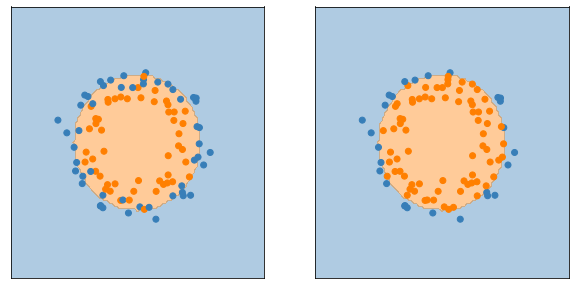

In [6]:
def Z(n): return ml.S_from_sklearn(
    sklearn.datasets.make_circles(n, noise=0.1, factor=0.75))


S = Z(100)  # let us make a dataset from the random variable Z
def h(X): return (X[:, 0]**2 + X[:, 1]**2 < 1).astype(int)


plt.figure(figsize=(10, 5))
xbounds = (-2, 2)
ybounds = (-2, 2)

ax = plt.subplot(1, 2, 1)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h, xbounds, ybounds)
draw.samples_2d(ax, S)

ax = plt.subplot(1, 2, 2)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h, xbounds, ybounds)
draw.prediction_2d(ax, h, ml.x_of(S))

plt.show()


In [7]:
def Z(n): return ml.S_from_sklearn(
    sklearn.datasets.make_circles(n, noise=0.1, factor=0.75))


S = Z_moons(100)  # let us make a dataset from the random variable Z
def h(X): return (X[:, 0]**2 + X[:, 1]**2 < 1).astype(int)


T = Z_moons(50)  # Test set
classifier_overfitting_classifier = overfitting_classifier()
X_overfitting_classifier, y_overfitting_classifier = ml.S_to_sklearn(S)
# Learning is done here
classifier_overfitting_classifier.fit(
    X_overfitting_classifier, y_overfitting_classifier)
y_pred_overfitting_classifier = classifier_overfitting_classifier.predict(
    ml.x_of(T))


classifier_good_classifier = good_classifier()
X_good_classifier, y_good_classifier = ml.S_to_sklearn(S)
# Learning is done here
classifier_good_classifier.fit(X_good_classifier, y_good_classifier)
y_pred_good_classifier = classifier_good_classifier.predict(ml.x_of(T))


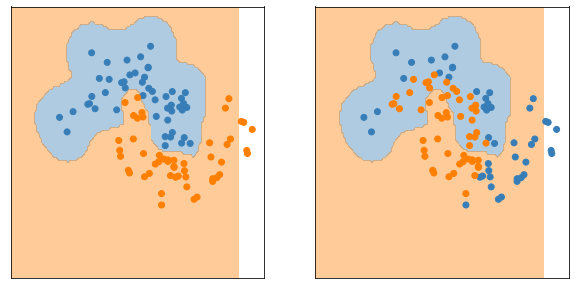

In [8]:


plt.figure(figsize=(10, 5))
xbounds = (-2, 2)
ybounds = (-2, 2)

ax = plt.subplot(1, 2, 1)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, ml.predictor(
    classifier_overfitting_classifier), xbounds, ybounds)
draw.samples_2d(ax, S)

ax = plt.subplot(1, 2, 2)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, ml.predictor(
    classifier_overfitting_classifier), xbounds, ybounds)
draw.prediction_2d(ax, h, ml.x_of(S))

plt.show()


def real_risk(h,loss,Z,n):
    y = randomvar.apply_array(lambda z : loss(h(ml.x_of(z)), ml.y_of(z)), Z)
    return randomvar.expectancy(y, n);

In [9]:
def Z(n): return ml.S_from_sklearn(
    sklearn.datasets.make_circles(n, noise=0.1, factor=0.75))


def h(X): return (X[:, 0]**2 + X[:, 1]**2 < 1).astype(int)
def loss(y1, y2): return y1 != y2


# expectancy is estimated from 10000 samples.
R = ml.real_risk(h, loss, Z, 10000)
print('R(h) = {} close to 0.24'.format(R))


R(h) = 0.2438 close to 0.24


In [10]:
from ml import S_to_sklearn, predictor, x_of, y_of


def fit(good_classifier, D):
    def learn_for_one_dataset(d):
        dx = x_of(d)
        dy = y_of(d)
        model = good_classifier()
        model.fit(dx, dy)
        return predictor(model)

    return randomvar.apply_retry(learn_for_one_dataset, D)


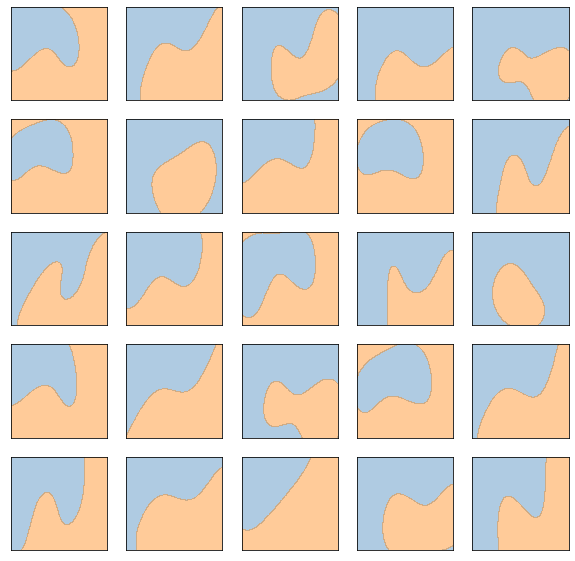

In [11]:
Z = Z_moons
D = randomvar.nuplet(Z, 20)
h_n = fit(good_classifier, D)

plt.figure(figsize=(10, 10))
xbounds = (-2, 3)
ybounds = (-1.5, 2)
for i, h in enumerate(h_n(25)):
    ax = plt.subplot(5, 5, i+1)
    draw.no_tics(ax)
    draw.decision_boundary_2d(ax, h, xbounds, ybounds, Nsamples=200)
plt.show()


In [12]:
def diff(h1, h2, loss, Z, N):
    y = randomvar.apply_array(lambda z: loss(h1(x_of(z)), h2(x_of(z))), Z)
    return randomvar.expectancy(y, N)


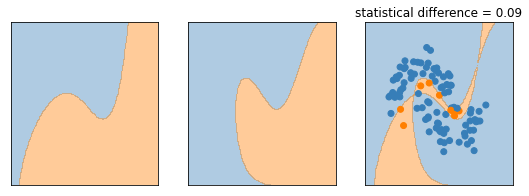

In [13]:
Z = ml.Z_moons
S = Z(100)
D = randomvar.nuplet(Z, 20)
h_n = ml.fit(ml.good_classifier, D)
def loss(y1, y2): return y1 != y2


N = 1000  # for expectancy estimation

h1, h2 = h_n(2)
def h3(X, f=h1, g=h2): return loss(f(X), g(X))


plt.figure(figsize=(9, 3))
xbounds = (-2, 3)
ybounds = (-1.5, 2)

ax = plt.subplot(1, 3, 1)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h1, xbounds, ybounds, Nsamples=200)

ax = plt.subplot(1, 3, 2)
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h2, xbounds, ybounds, Nsamples=200)

ax = plt.subplot(1, 3, 3)
ax.set_title('statistical difference = {}'.format(diff(h1, h2, loss, Z, N)))
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h3, xbounds, ybounds, Nsamples=200)
draw.prediction_2d(ax, h3, ml.x_of(S))

plt.show()


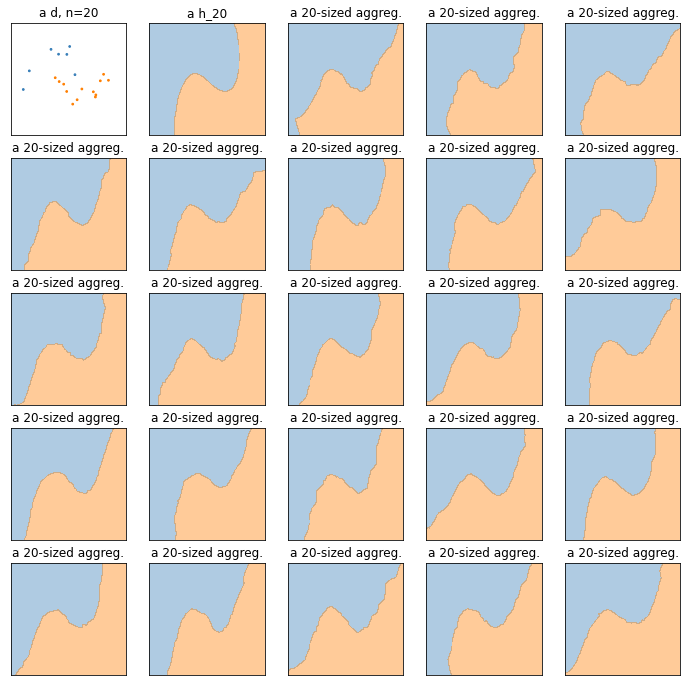

In [14]:
Z = ml.Z_moons
S = Z(100)
n= 20
D = randomvar.nuplet(Z, 20)
h_n = ml.fit(ml.good_classifier, D)
def loss(y1, y2): return y1 != y2


k = 20
h_n_k = randomvar.nuplet(h_n, k)
a_nk = randomvar.apply(functional.majority_merge, h_n_k)
plt.figure(figsize=(12, 12))
xbounds = (-2, 3)
ybounds = (-1.5, 2)

ax = plt.subplot(5, 5, 1)
ax.set_xlim(xbounds)
ax.set_ylim(ybounds)
ax.set_title('a d, n={}'.format(n))
draw.no_tics(ax)
draw.samples_2d(ax, D(1)[0], dotsize=3)

ax = plt.subplot(5, 5, 2)
ax.set_title('a h_{}'.format(n))
draw.no_tics(ax)
draw.decision_boundary_2d(ax, h_n(1)[0], xbounds, ybounds, Nsamples=200)

for i, aggreg in enumerate(a_nk(23)):
    #print('plot {:02d}/25'.format(i+3))
    ax = plt.subplot(5, 5, i+3)
    ax.set_title('a {}-sized aggreg.'.format(k))
    draw.no_tics(ax)
    draw.decision_boundary_2d(ax, aggreg, xbounds, ybounds, Nsamples=200)
plt.show()


01/25
02/25
03/25
04/25
05/25
06/25
07/25
08/25
09/25
10/25
11/25
12/25
13/25
14/25
15/25
16/25
17/25
18/25
19/25
20/25
21/25
22/25
23/25
24/25
25/25


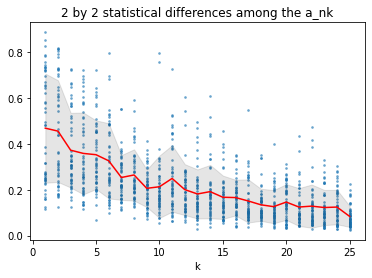

In [15]:
ks = [k for k in range(1, 26)]
Z = ml.Z_moons
def loss(y1, y2): return y1 != y2


N = 1000  # for expectancy estimation (diff)
M = 50   # for distribution plotting

n = 10
D = randomvar.nuplet(Z, n)
h_n = ml.fit(ml.overfitting_classifier, D)
dots_x = []
dots_y = []
avgs = []
stds = []
for k in ks:
        print('{:02d}/{}'.format(k, ks[-1]))
        a_nk = randomvar.apply(functional.majority_merge,
                               randomvar.nuplet(h_n, k))
        diff = randomvar.apply(lambda h1h2: ml.diff(h1h2[0], h1h2[1], loss, Z, N),randomvar.nuplet(a_nk, 2))
        diffs = diff(M)
        dots_x += [k]*M
        dots_y += list(diffs)
        avgs.append(np.mean(diffs))
        stds.append(np.std(diffs))
avgs = np.array(avgs)
stds = np.array(stds)
plt.figure()
plt.title('2 by 2 statistical differences among the a_nk')
plt.xlabel('k')
plt.scatter(dots_x, dots_y, s=3, alpha=.5, zorder=1)
plt.plot(ks, avgs, 'r-', zorder=3)
plt.fill_between(ks, avgs - stds, avgs + stds,
                     color='k', alpha=.1, zorder=2)
plt.show()


In [18]:
Z = ml.Z_moons
def loss(y1, y2): return y1 != y2


n = 10
D = randomvar.nuplet(Z, n)
h_n = ml.fit(ml.overfitting_classifier, D)

N = 1000  # for expectancy estimation (diff)
K = 50  # for expectancy estimation (E(h_n) or E(a_nk))
M = 50  # for expectancy estimation (E(h_n - E) or E(a_nk - E))

# First, let us compute de stddev of h_n as previously, for a
# single n. This will be a reference stddev, i.e. the one of a_nk
# should be reduced.

a_nK = randomvar.apply(functional.majority_merge, randomvar.nuplet(h_n, K))
E_hn = a_nK(1)[0]
diff = randomvar.apply(lambda h: ml.diff(h, E_hn, loss, Z, N), h_n)
stddev_ref = randomvar.expectancy(diff, M)

print()
print('stddev(h_{}) = {}'.format(n, stddev_ref))
print()

stddevs = []
ks = [k for k in range(1, 52, 5)]
for k in ks:
        print('{:02d}/{}'.format(k, ks[-1]))
        a_nk = randomvar.apply(functional.majority_merge,
                               randomvar.nuplet(h_n, k))
        A_nK = randomvar.apply(functional.majority_merge,
                               randomvar.nuplet(a_nk, K))
        E_ank = A_nK(1)[0]
        diff = randomvar.apply(lambda h: ml.diff(h, E_ank, loss, Z, N), a_nk)
        stddevs.append(randomvar.expectancy(diff, M))
plt.figure()
plt.title('Std. dev. of a_nk, n={}'.format(n))
plt.xlabel('k')
plt.axhline(stddev_ref, color='k', ls='--', alpha=.2)
plt.plot(ks, stddevs, 'r-')
plt.show()



stddev(h_10) = 0.33311999999999997

01/51
06/51
11/51
16/51
21/51
26/51
31/51
36/51
41/51
46/51
51/51


In [ ]:
ks = [k for k in range(1, 52, 5)]

def variance_analysis(D, Z, tag):  # This is similar to the previous code
        loss = lambda y1, y2: y1 != y2
        h_n = ml.fit(ml.overfitting_classifier, D)
        N = 1000  # for expectancy estimation (diff)
        K = 10  # for expectancy estimation (E(h_n) or E(a_nk))
        M = 10  # for expectancy estimation (E(h_n - E) or E(a_nk - E))
        stddevs = []
        for k in ks:
            print('{} : {:02d}/{}'.format(tag, k, ks[-1]))
            a_nk = randomvar.apply(
               functional.majority_merge, randomvar.nuplet(h_n, k))
            A_nK = randomvar.apply(
               functional.majority_merge, randomvar.nuplet(a_nk, K))
            E_ank = A_nK(1)[0]
            diff = randomvar.apply(
                lambda h: ml.diff(h, E_ank, loss, Z, N), a_nk)
            stddevs.append(randomvar.expectancy(diff, M))
        return np.array(stddevs)
n = 10
Z = ml.Z_moons
D = randomvar.nuplet(Z, n)
stddev_iid = variance_analysis(D, Z, 'iid')
B = randomvar.bootstrap(randomvar.nuplet(Z, 2*n)(1)[0])
D = randomvar.nuplet(B, n)
stddev_bst = variance_analysis(D, Z, 'bootstrap')
plt.figure()
plt.title('Std. dev. of a_nk, n={}'.format(n))
plt.xlabel('k')
plt.plot(ks, stddev_iid, label='iid')
plt.plot(ks, stddev_bst, label='bootstrap')
plt.legend()
plt.show()
